In [24]:
from keras.datasets import reuters
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from itertools import islice
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import sys

# Helper Function

In [2]:
# np.set_printoptions(threshold=sys.maxsize)
def take(n, iterable):
    # Return first item of the iterable as a list
    return list(islice(iterable, n))

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# Data Acqusition

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\keras\datasets\reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\keras\datasets\reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
print(type(train_data))

<class 'numpy.ndarray'>


In [5]:
len(train_data)

8982

In [6]:
for i in range(0, 2):
    print(train_data[i])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]


In [7]:
for i in range(0,2):
    print(test_data[i])

[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]
[1, 2768, 283, 122, 7, 4, 89, 544, 463, 29, 798, 748, 40, 85, 306, 28, 19, 59, 11, 82, 84, 22, 10, 1315, 19, 12, 11, 82, 52, 29, 283, 1135, 558, 2, 265, 2, 6607, 8, 6607, 118, 371, 10, 1503, 281, 4, 143, 4811, 760, 50, 2088, 225, 139, 683, 4, 48, 193, 862, 41, 967, 1999, 30, 1086, 36, 8, 28, 602, 19, 32, 11, 82, 5, 4, 89, 544, 463, 41, 30, 6273, 13, 260, 951, 6607, 8, 69, 1749, 

In [8]:
len(test_data)

2246

# Data Decoding

In [9]:
# Getting word index dictionary
word_index = reuters.get_word_index()
word_index_example = take(10, word_index.items())
word_index_example

[('mdbl', 10996),
 ('fawc', 16260),
 ('degussa', 12089),
 ('woods', 8803),
 ('hanging', 13796),
 ('localized', 20672),
 ('sation', 20673),
 ('chanthaburi', 20675),
 ('refunding', 10997),
 ('hermann', 8804)]

In [10]:
# Reversing word index dictionary
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index_example  = take(10, reverse_word_index.items())
reverse_word_index_example

[(10996, 'mdbl'),
 (16260, 'fawc'),
 (12089, 'degussa'),
 (8803, 'woods'),
 (13796, 'hanging'),
 (20672, 'localized'),
 (20673, 'sation'),
 (20675, 'chanthaburi'),
 (10997, 'refunding'),
 (8804, 'hermann')]

In [11]:
# Creating Word dictionary
word_dictionary = pd.DataFrame(reverse_word_index.items())
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(word_dictionary)
display(word_dictionary)

,0,1
0,10996,mdbl
1,16260,fawc
2,12089,degussa
3,8803,woods
4,13796,hanging
...,...,...
30974,16258,rotting
30975,10995,pods
30976,2849,emery
30977,30979,northerly


In [12]:
# Decoding train data message
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[1]])
print(decoded_newswire)

? philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration ? chairman ? yulo said yulo told reuters a survey during the current milling season which ends next month showed the 1986 87 estimate would almost certainly be met he said at least 1 2 mln tonnes of the 1987 88 crop would be earmarked for domestic consumption yulo said about 130 000 tonnes would be set aside for the u s sugar quota 150 000 tonnes for strategic reserves and 50 000 tonnes would be sold on the world market he said if the government approved a long standing ? recommendation to manufacture ethanol the project would take up another 150 000 tonnes slightly raising the target the government for its own reasons has been delaying approval of the project but we expect it to come through by july yulo said ethanol could make up five pct of gasoline cutting the oil import bill by about 300 mln pesos yulo sa

# Data Preparation

In [13]:
# Vectorize train and test data  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

len(x_train)

8982

In [14]:
# vectorize train and test labels
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

len(one_hot_test_labels)

2246

#  Building Network

We will use 64 hidden units, this is because the final outputs are 46 dimientional. Hence we should avoid intermediate layers with many fewer than 46 hidden units.
Technically if your model has fewer hidden units compared to what's required, your model be a model with an information bottleneck.

Bottleneck in a model will result in drop of accuracy, mostly due to the fact that yo're trying to compress a lot of information into an intermediate space that is too low-dimentional

Why softmax?
    Softmax activation is performs best in a single-label, multiclass problem. The activation returns 
    a probability distributuin over the N output classes, for our case 46 classes

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))



# Model compilation

In [16]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training

In [17]:
# To train a model we need partial training data and validation data
# All of these data are taken from our dataset above
# 1000 items for validation and the rest for partial training
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 181us/step - loss: 2.7980 - accuracy: 0.5075 - val_loss: 1.8924 - val_accuracy: 0.6310
Epoch 2/20
7982/7982 [==============================] - 1s 129us/step - loss: 1.5097 - accuracy: 0.6858 - val_loss: 1.3507 - val_accuracy: 0.6970
Epoch 3/20
7982/7982 [==============================] - 1s 129us/step - loss: 1.0962 - accuracy: 0.7643 - val_loss: 1.1449 - val_accuracy: 0.7530
Epoch 4/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.8599 - accuracy: 0.8212 - val_loss: 1.0210 - val_accuracy: 0.7990
Epoch 5/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.6879 - accuracy: 0.8609 - val_loss: 0.9824 - val_accuracy: 0.8040
Epoch 6/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.5551 - accuracy: 0.8910 - val_loss: 0.9157 - val_accuracy: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 140us/step - loss

# Plotting  Training and Validation Loss

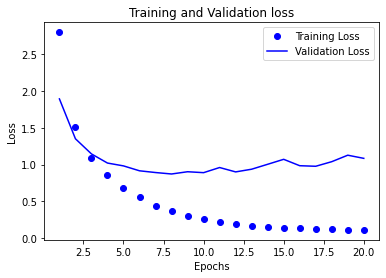

In [25]:
# Data acquisition
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Graph is drawn loss against epochs
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Training and Validation Accuracy

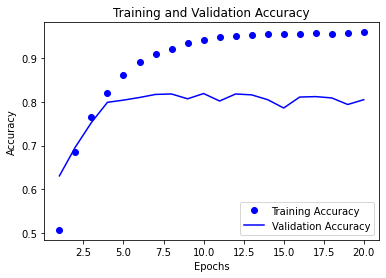

In [27]:
# Data Acquisition
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# Graph is drawn accuracy against epochs
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
From the above graphs you can determine how many epochs you need in order to retrain your model.
As you can see a model start to overfit on epoch nine. For this case retrain a brand new model
using nine epochs. Make sure you use both partial and val_data for validation

# Creating a model with four epochs 

In [51]:
# Layers Definition
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Model Compilation
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Training Model
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 131us/step - loss: 2.5893 - accuracy: 0.5182 - val_loss: 1.7183 - val_accuracy: 0.6400
Epoch 2/9
7982/7982 [==============================] - 1s 121us/step - loss: 1.4152 - accuracy: 0.7041 - val_loss: 1.2798 - val_accuracy: 0.7310
Epoch 3/9
7982/7982 [==============================] - 1s 119us/step - loss: 1.0453 - accuracy: 0.7759 - val_loss: 1.1058 - val_accuracy: 0.7570
Epoch 4/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.8201 - accuracy: 0.8282 - val_loss: 1.0095 - val_accuracy: 0.7880
Epoch 5/9
7982/7982 [==============================] - 1s 119us/step - loss: 0.6582 - accuracy: 0.8642 - val_loss: 0.9566 - val_accuracy: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.5251 - accuracy: 0.8919 - val_loss: 0.9284 - val_accuracy: 0.8090
Epoch 7/9
7982/7982 [==============================] - 1s 146us/step - loss: 0.432

In [52]:
history_dict = history.history
history_visual = pd.DataFrame(history_dict.items())
history_visual

,0,1
0,val_loss,"[1.7183226051330567, 1.2798442964553833, 1.105..."
1,val_accuracy,"[0.6399999856948853, 0.7310000061988831, 0.757..."
2,loss,"[2.5893407586940516, 1.4152492030883785, 1.045..."
3,accuracy,"[0.5181659, 0.7040842, 0.7758707, 0.82823855, ..."


In [53]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 190us/step


[0.9816222133534568, 0.7880676984786987]

From above you can observe that we have manage to come up with a model that has 78% on test data.
predict method below is how you will use this model on a practical examples. The output will be probability of success classication of all 46 topics

In [57]:
results = model.predict(x_test)
results[0].shape


(46,)

In [63]:
results[0]

array([1.10694955e-05, 8.95119083e-05, 4.31423905e-06, 6.07707977e-01,
       3.80118787e-01, 2.65409312e-06, 7.71484803e-04, 1.09905286e-05,
       6.99423545e-04, 2.04368152e-05, 9.56290387e-05, 9.10027069e-04,
       5.46832052e-05, 4.65508114e-04, 6.05934729e-05, 2.86142807e-04,
       2.00532051e-03, 2.13255582e-04, 7.81989365e-05, 7.03379803e-04,
       5.54370985e-04, 9.13072785e-04, 4.34909416e-05, 5.01324903e-05,
       2.80175900e-05, 5.42973066e-05, 7.18967428e-08, 1.80772713e-05,
       7.45788520e-06, 7.30524713e-04, 6.20508799e-05, 1.93806118e-04,
       3.60757222e-05, 9.12159703e-06, 3.80267084e-05, 1.02564009e-05,
       2.41016853e-03, 1.48922903e-04, 6.17239903e-06, 9.69603279e-05,
       7.11751727e-06, 2.37214510e-04, 9.44479325e-06, 1.97187478e-06,
       1.91690833e-05, 4.63906463e-06], dtype=float32)

The coefficients in a vextor sum to one

In [60]:
total_probability = np.sum(results[0])
total_probability

1.0

The class with highest probability is given by

In [62]:
high_class = np.argmax(results[0])
high_class

3